#Problem 4

# Apply deterministic algorithm and compute images associated with the IFS code given in Table below. Run your program and obtain softcopy of the output.

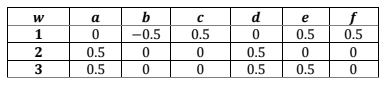


In [15]:
#Importing the libraries to plot pixels in the canvas
from PIL import Image
import numpy as np

#Total number of pixels generated in the image
n=512 

#creating an image with size nxn pixels and creating a numpy array whose values are similar to the image created above
im = Image.new('RGB', (n, n))    
imgin = np.array(im)             

#A similar temporary array and image is created as same as original image
tempoin = Image.new('RGB', (n, n))
t=np.array(tempoin)

#Initially all pixels are black in the image. 
##Since, from 0-255:- '0' value is defined for bloac pixel we are creating a black pixel by (0,0,0)
for i in range(n):
  for j in range(n):
    imgin[i][j]=(0,0,0)

#The IFS Given for the following code is as given below:
a=[0,0.5,0.5]
b=[-0.5,0,0]
c=[0.5,0,0]
d=[0,0.5,0.5]
e=[0.5,0,0.5]
f=[0.5,0,0]

#Making a Square for all the boundary pixels. By making its pixel value(255,255,255) Which means white color
#After this loop there will be a single square; by making all the boundary pixel values as white let this as 'A0'
for i in range(0,n):
  t[i, 0] = (255,255,255)
  t[0, i] = (255,255,255)
  t[n-1, i] = (255,255,255)
  t[i, n-1] = (255,255,255)

#Now we will define a method/ function
#Method/function to generate fractal for each iteration by transformation
#Starting from the initial set A0  it will compute the sequence of sets generated by the function
def fractal_gen(t,imgin,iterate):
  for iter in range(0,iterate):
    #Displaying the number of iteration it takes
    print('iteration:' +str(iter))
    for i in range(0,n):
      for j in range(0,n):
        if t[i,j,0] == 255:
      
          #Applying 'W' to the initial set having variable 'imgin' i.e, A0 to make A(n+1) in the array imgin(i,j)
          imgin[(int)(a[0]*i + b[0]*j + e[0]*n), (int)(c[0]*i + d[0]*j + f[0]*n)]=(255,255,255)
          imgin[(int)(a[1]*i + b[1]*j + e[1]*n), (int)(c[1]*i + d[1]*j + f[1]*n)]=(255,255,255)
          imgin[(int)(a[2]*i + b[2]*j + e[2]*n), (int)(c[2]*i + d[2]*j + f[2]*n)]=(255,255,255)
    
    #Now putting all the generated values in the temporary array which was declared at the initial stage as "t"
    for k in range(0,n):
      for m in range(0,n):
        t[k,m]=imgin[k,m]
        #After putting the values into the temporary array, we are resetting the pixel in the original image i.e, screen
        imgin[k,m]=(0,0,0)
        #Since, WKT (0,0,0) Pixels are associated for black pixel we are using it to rest the screen
  
  new_im = Image.fromarray(t)
  new_im.save('Deterministic15.jpg')
  #After the final interation gets completed; 
  #then the fractal which we are supposed to produce is saved in the file named 'Fractal.jpg'

#We are calling the Method for generating the fractal. Since, we need to declare the method before calling it.
fractal_gen(t,imgin,15)
#Here the fractal is generated after completing 15 iterations successfully.

#The most awaited Fractal is now saved in the file named: Fractal.jpg 

iteration:0
iteration:1
iteration:2
iteration:3
iteration:4
iteration:5
iteration:6
iteration:7
iteration:8
iteration:9
iteration:10
iteration:11
iteration:12
iteration:13
iteration:14


# Problem 8 Apply random iteration algorithm and compute images associated with the IFS code given in Table below. Run your program and obtain softcopy of the output (the probabilities given in the last column play an important role in the computation of images of the attractor).

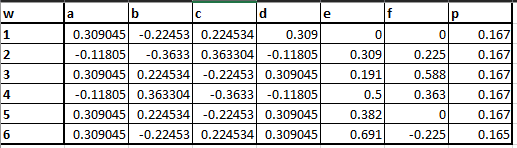

In [16]:
#Importing the libraries to plot pixels in the canvas
from PIL import Image
import random

#IFS Code Associated with the Fractal to be generated
#[A,B,C,D,E,F,P]
input=[[0.309045,-0.224534,0.224534,0.309000,0.0000,0.0000,0.167],
     [-0.118045,-0.363304,0.363304,-0.118045,0.3090,0.2250,0.167],
     [0.309045,0.224534,-0.224534,0.309045,0.1910,0.5880,0.167],
     [-0.118045,0.363304,-0.363304,-0.118045,0.5000,0.3630,0.167],
     [0.309045,0.224534,-0.224534,0.309045,0.3820,0.0000,0.167],
     [0.309045,-0.224534,0.224534,0.309045,0.6910,-0.2250,0.165]]

# image size on the x-axis and y-axis i.e, number of pixels generated in the image for each axis
x_img = 512
y_img = 512 

#calculating the number of cells in the given data
m = len(input)

# finding the xmin, xmax, ymin, ymax
x = input[0][4]
y = input[0][5] 

#Considering Xmin, Xmax & Ymin, Ymax 
xa = x
xb = x
ya = y
yb = y

#Random iteration will start here 
for k in range(x_img * y_img):
    #An initial random point is chosen using the Random library provided
    p=random.random()
    randsum = 0.0
    for i in range(m):
        randsum += input[i][6]
        if p <= randsum:
            break
    
    #Applying Affine Transforinpution number k to (x,y)
    x0 = x * input[i][0] + y * input[i][1] + input[i][4] 
    y  = x * input[i][2] + y * input[i][3] + input[i][5] 
    x = x0 
    
    if x < xa:
        xa = x
    if x > xb:
        xb = x
    if y < ya:
        ya = y
    if y > yb:
        yb = y

# drawing the fractal 
image = Image.new("L", (x_img, y_img))

x=0.0
y=0.0 

#Similarly like the previous question, we are plotting it by making the pixel value to white
for k in range(x_img * y_img):
    print('iteration:' +str(k))
    p=random.random()
    randsum = 0.0
    for i in range(m):
        randsum += input[i][6]
        if p <= randsum:
            break
    x0 = x * input[i][0] + y * input[i][1] + input[i][4] 
    y  = x * input[i][2] + y * input[i][3] + input[i][5] 
    x = x0 
    jx = int((x - xa) / (xb - xa) * (x_img - 1)) 
    jy = (y_img - 1) - int((y - ya) / (yb - ya) * (y_img - 1))
    image.putpixel((jx, jy), 255) 
    if(k%50000==0):
      image.save("RandomIteration"+str(k)+".png", "PNG")
image.save("RandomIteration Final.png", "PNG")
#Here the fractal is generated after completing 262143 iterations successfully.
#The most awaited Fractal is now saved in the file named: Fractal.jpg 

Streaming output truncated to the last 5000 lines.
iteration:257144
iteration:257145
iteration:257146
iteration:257147
iteration:257148
iteration:257149
iteration:257150
iteration:257151
iteration:257152
iteration:257153
iteration:257154
iteration:257155
iteration:257156
iteration:257157
iteration:257158
iteration:257159
iteration:257160
iteration:257161
iteration:257162
iteration:257163
iteration:257164
iteration:257165
iteration:257166
iteration:257167
iteration:257168
iteration:257169
iteration:257170
iteration:257171
iteration:257172
iteration:257173
iteration:257174
iteration:257175
iteration:257176
iteration:257177
iteration:257178
iteration:257179
iteration:257180
iteration:257181
iteration:257182
iteration:257183
iteration:257184
iteration:257185
iteration:257186
iteration:257187
iteration:257188
iteration:257189
iteration:257190
iteration:257191
iteration:257192
iteration:257193
iteration:257194
iteration:257195
iteration:257196
iteration:257197
iteration:257198
iteration:2571